In [54]:
import sys
sys.path.append("../src")
import lightbeam
from lightbeam.mesh import RectMesh3D, RectMesh2D
import lightbeam.optics as optics
import lightbeam.optics2 as optics2
from lightbeam import LPmodes
from lightbeam.misc import normalize
from lightbeam.prop import Prop3D

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

%matplotlib inline

In [55]:
# wavelength: 1.5 um
# background (capillary) index: 1.4345
# SM cladding index: 1.44
# SM core index: 1.4522895
# T (taper ratio): 10
# Cladding output diameter: 328 um
# Cladding input diameter: 32.8 um (ie 328/T)
# SM core diam: 6.5 um
# SM core separation (on hex grid): 60 um

wl = 1.5 # um
njack = 1.4345
nclad = 1.44
ncore = 1.4522895
mm_rjack = 76.3 # um
mm_rclad = 32.8 # um
taper_ratio = 10
sm_rcore = 6.5 # um
mm_rjack = 76.3 # um
sm_rclad = 32.8 # um
sm_seperation_initial = 2*sm_rcore # um
sm_seperation_final = 2*60 # um
# # what is MM core radius assuming 2 um from http://dx.doi.org/10.1364/AOP.7.000107, 
# # measurements of figure 6 c): 570, 105
# mm_rcore = 28 # um ROUGH GUESS
sm_offset = 100
sm_ex = 40000
scale_func = None
l = 2
m = 2

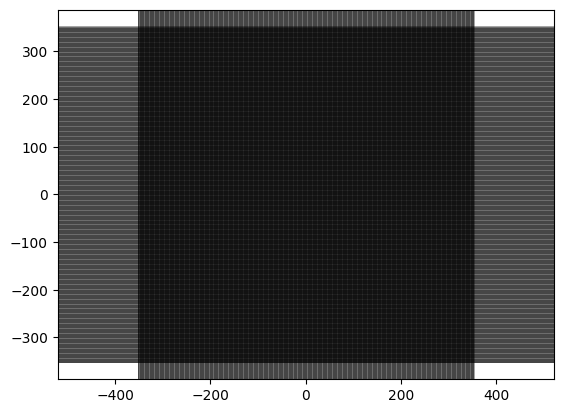

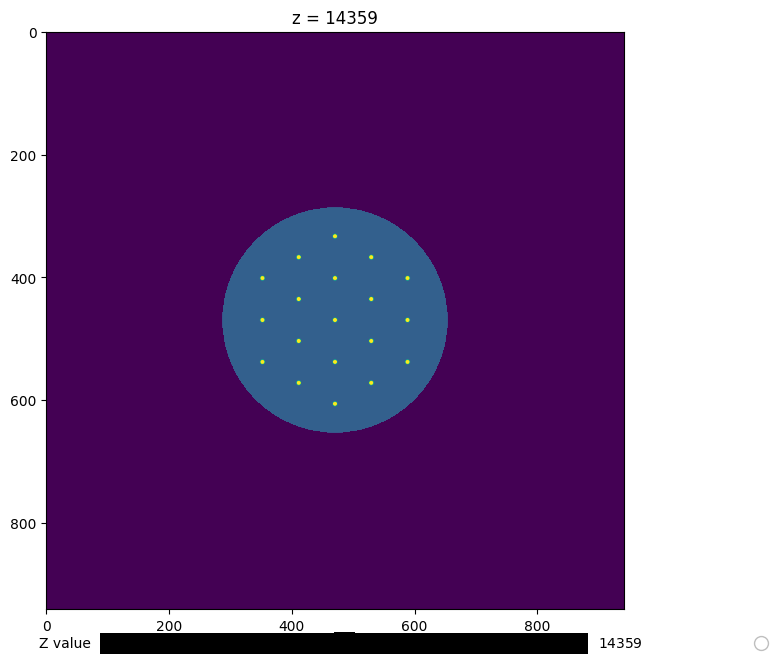

In [56]:
xw = 600 #um
yw= 600 #um
zw = sm_ex #um
num_PML = 70 #grid units

ds = 0.75 #um
dz = 10 #um

_mesh = RectMesh3D(xw,yw,zw,ds,dz,num_PML)
_mesh.xy.plot_mesh()

In [57]:
lant19_ipos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_initial)
lant19_fpos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_final)

#lant19pos = optics.lant19.get_19port_positions(core_spacing=sm_rcore)
clad_mm = optics.scaled_cyl([0,0],mm_rclad,sm_offset,nclad,njack,0,scale_func=scale_func,final_scale=1)
clad_sm = optics.scaled_cyl([0,0],sm_rclad,sm_ex,nclad,njack,sm_offset,scale_func=scale_func,final_scale=taper_ratio)
elmnts = [clad_mm, clad_sm]

for i in range(0,len(lant19_ipos)):
    core = optics2.scaled_cyl(xy=lant19_ipos[i],fxy=lant19_fpos[i] ,r = sm_rcore/taper_ratio,z_ex = sm_ex,n = ncore,nb = nclad,z_offset=sm_offset,scale_func=scale_func,final_scale=taper_ratio)
    elmnts.append(core)

lant19 = optics.OpticSys(elmnts,njack)
lant19.set_sampling(_mesh.xy)

out = np.zeros(_mesh.xy.shape)


# fig, axs = plt.subplots(1, 1, figsize=(7.5,7.5))
# ax_slider = plt.axes([0.2, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')
# slider = Slider(ax_slider, 'Z value', 0, sm_ex, valinit=0, valstep=1)

# lant19.set_IORsq(out, 0)
# im = axs.imshow(out, vmin=njack*njack, vmax=ncore*ncore)
# axs.set_title(f"z = 0")
# # Define the update function for the slider
# def update(val):
#     z_value = int(slider.val)
#     out = np.zeros(_mesh.xy.shape)
#     lant19.set_IORsq(out, z_value)
#     im.set_data(out)
#     axs.set_title(f"z = {z_value}")
#     fig.canvas.draw_idle()

# # Attach the update function to the slider
# slider.on_changed(update)

# plt.show()

# # Create the figure and axes for the subplots
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# # Generate the first subplot
# lant19.set_IORsq(out, 0)
# lims = [500,800]
# # axs[0].set_xlim(lims)
# # axs[0].set_ylim(lims)
# # axs[0].set_xlabel('"Zoomed in"')
# axs[0].imshow(out, vmin=njack*njack, vmax=ncore*ncore)
# axs[0].set_title(f"Multimode input || z = 0 to {sm_offset}")

# # Generate the second subplot
# lant19.set_IORsq(out, sm_offset)
# # axs[1].set_xlim(lims)
# # axs[1].set_ylim(lims)
# # axs[1].set_xlabel('"Zoomed in"')
# axs[1].imshow(out, vmin=njack*njack, vmax=ncore*ncore)
# axs[1].set_title(f"Single mode before taper || z = {sm_offset}")

# # Generate the third subplot
# lant19.set_IORsq(out, sm_ex)
# axs[2].imshow(out, vmin=njack*njack, vmax=ncore*ncore)
# axs[2].set_title(f"Single mode output || z = {sm_ex}")
# # Display the figure with the subplots
# plt.tight_layout()
# plt.show()

#_mesh.xy.plot_mesh()

input field: 


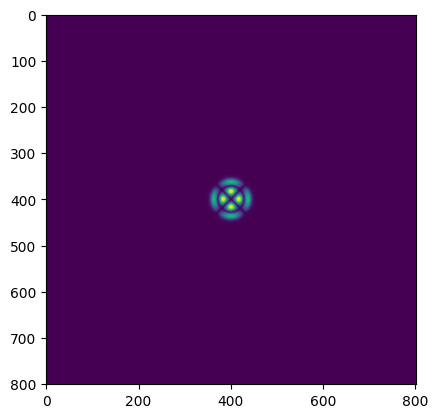

In [46]:
import lightbeam.LPmodes as LPmodes
from lightbeam.misc import normalize

xg, yg = _mesh.xg[num_PML:-num_PML,num_PML:-num_PML],_mesh.yg[num_PML:-num_PML,num_PML:-num_PML]
u0 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))

print("input field: ")
plt.imshow(np.abs(u0))
plt.show()

#### propagation ####

from lightbeam.prop import Prop3D

prop = Prop3D(wl,_mesh,lant19,nclad)

In [47]:
u0 = prop.prop2end_uniform(u0)

input power:  1.0000000000000004
propagating field...
initial shape:  (941, 941)
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
final total power 0.9874727772706526
'prop2end_uniform'  2013.5146 s


output field: 


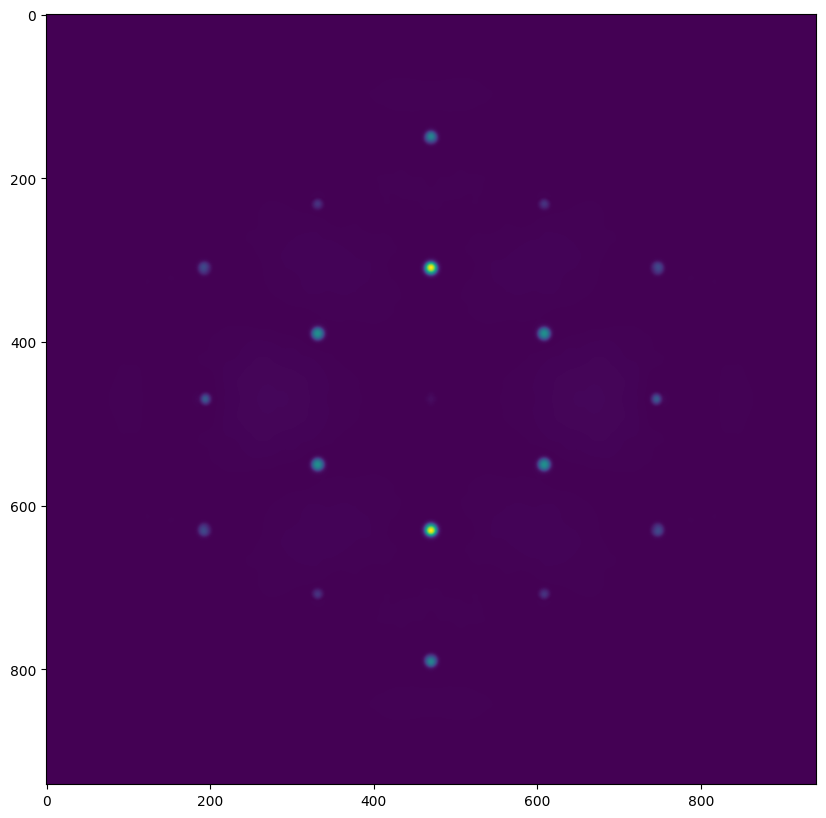

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
print("output field: ")
plt.imshow(np.abs(u0))
plt.show()

**Seperating the light propogation between the different meshes for each object**


In [42]:
# wavelength: 1.5 um
# background (capillary) index: 1.4345
# SM cladding index: 1.44
# SM core index: 1.4522895
# T (taper ratio): 10
# Cladding output diameter: 328 um
# Cladding input diameter: 32.8 um (ie 328/T)
# SM core diam: 6.5 um
# SM core separation (on hex grid): 60 um
%matplotlib inline
wl = 1.5 # um
njack = 1.4345
nclad = 1.44
ncore = 1.4522895
mm_rjack = 76.3 # um
mm_rclad = 32.8 # um
taper_ratio = 10
sm_rcore = 6.5 # um
mm_rjack = 76.3 # um
sm_rclad = 32.8 # um
sm_seperation_initial = 2*sm_rcore # um
sm_seperation_final = 2*60 # um TEMP
sm_offset = 100
sm_ex = 40000
scale_func = None
ref_val = 2e-4
l = 2
m = 2

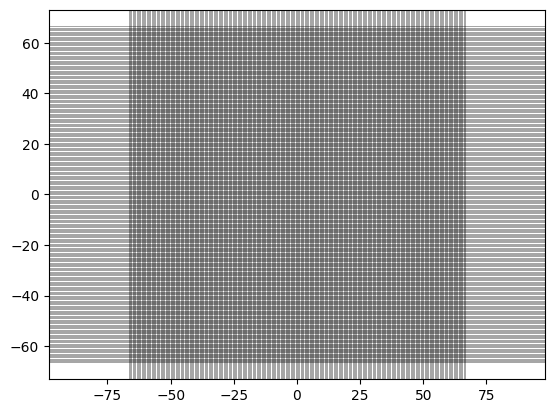

xg shape: (267, 267)
yg shape: (267, 267)
u0 shape: (267, 267)
input field: 


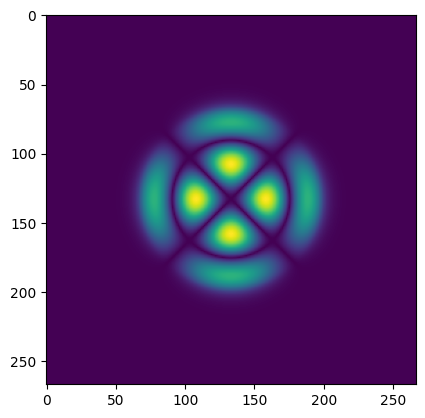

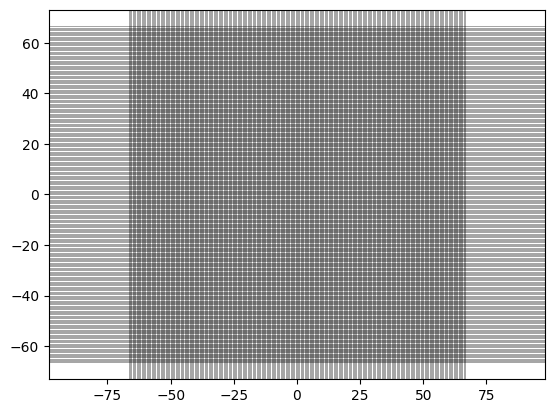

input power:  1.0
propagating field...
initial shape:  (267, 267)
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
final total power 0.9999953062733151
'prop2end_uniform'  2.5954 s
output field: 


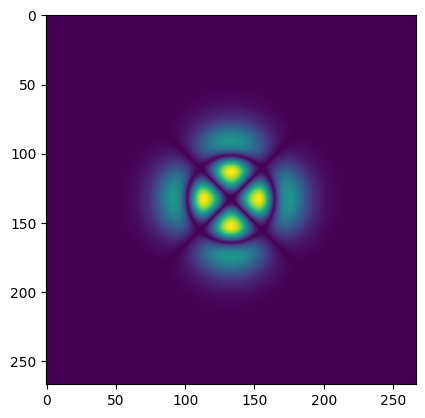

In [43]:
ds = 0.5 #um
dz = 0.5 #um
iw = 100 #um
zw = sm_offset #um
num_PML = round(mm_rclad) #grid units

_mesh = RectMesh3D(iw,iw,zw,ds,dz,num_PML)
_mesh.xy.plot_mesh()

clad_mm = optics.scaled_cyl([0,0],mm_rclad,sm_offset,nclad,njack,0,scale_func=scale_func,final_scale=1)

mm = optics.OpticSys([clad_mm],njack)

xg, yg = _mesh.xg,_mesh.yg
u0 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))
print(f"xg shape: {xg.shape}")
print(f"yg shape: {yg.shape}")
print(f"u0 shape: {u0.shape}")

print("input field: ")
plt.imshow(np.abs(u0))
plt.show()
# _mesh.xy.refine_base(u0,ref_val)
# mm.set_sampling(_mesh.xy)
_mesh.xy.plot_mesh()
prop = Prop3D(wl,_mesh,mm,njack)
u0 = prop.prop2end_uniform(u0)
print("output field: ")
plt.imshow(np.abs(u0))
plt.show()

In [ ]:
ds = 0.8 #um
dz = 10 #um
iw = 600 #um
zw = sm_ex #um
num_PML = 70 #grid units

_mesh = RectMesh3D(iw,iw,zw,ds,dz,num_PML)

lant19_ipos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_initial)
lant19_fpos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_final)

#lant19pos = optics.lant19.get_19port_positions(core_spacing=sm_rcore)
clad_mm = optics.scaled_cyl([0,0],mm_rclad,sm_ex,nclad,njack,0,scale_func=scale_func,final_scale=1)
clad_sm = optics.scaled_cyl([0,0],sm_rclad,sm_ex,nclad,njack,0,scale_func=scale_func,final_scale=taper_ratio)
elmnts = [clad_mm, clad_sm]

for i in range(0,len(lant19_ipos)):
    core = optics2.scaled_cyl(xy=lant19_ipos[i],fxy=lant19_fpos[i] ,r = sm_rcore/taper_ratio,z_ex = sm_ex,n = ncore,nb = nclad,z_offset=0,scale_func=scale_func,final_scale=taper_ratio)
    elmnts.append(core)

lant19 = optics.OpticSys(elmnts,njack)
lant19.set_sampling(_mesh.xy)

out = np.zeros(_mesh.xy.shape)
# Create the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Generate the first subplot
lant19.set_IORsq(out, 0)
# axs[0].set_xlim([300,500])
# axs[0].set_ylim([300,500])
axs[0].imshow(out, vmin=njack*njack, vmax=ncore*ncore)

# Generate the second subplot
lant19.set_IORsq(out, 100)
# axs[1].set_xlim([300,500])
# axs[1].set_ylim([300,500])
axs[1].imshow(out, vmin=njack*njack, vmax=ncore*ncore)

# Display the figure with the subplots
plt.tight_layout()
plt.show()
xg, yg = _mesh.xg,_mesh.yg
# u0 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))
print(f"xg shape: {xg.shape}")
print(f"yg shape: {yg.shape}")
print(f"u0 shape: {u0.shape}")

print("input field: ")
plt.imshow(np.abs(u0))
plt.show()
# _mesh.xy.refine_base(u0,ref_val)
# mm.set_sampling(_mesh.xy)
prop = Prop3D(wl,_mesh,lant19,nclad)
u1 = prop.prop2end_uniform(u0)
print("output field: ")
plt.imshow(np.abs(u1))
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
print("output field: ")
plt.imshow(np.abs(u1))
plt.show()